In [1]:
import pandas as pd

from bengrn import get_GT_db, get_perturb_gt, get_sroy_gt, BenGRN, FILEDIR

import numpy as np
import tqdm
import os

%load_ext autoreload
%autoreload 2

/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


# J comparison of gene networks from human interactome, cellmaps, omnipath,

In [2]:
gwps = get_perturb_gt()
gwps.var.index = gwps.var.gene_name
omni = get_GT_db("omnipath")
collectri = get_GT_db("collectri")

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:657: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sc.obs["organism_ontology_term_id"] = "NCBITaxon:9606"


In [ ]:
gwps = gwps.extract_links()

In [3]:
# extracting PPI data from "computing the human interactome"
humaninter = pd.read_csv(
    "http://prodata.swmed.edu/humanPPI/bulk_download/GoodPairs.txt",
    sep="\t",
    skiprows=4,
)

In [4]:
# getting U2OS cell map data
import json
try:
    import ndex2
except ImportError:
    os.system('uv pip install ndex2')
    import ndex2
from ndex2.cx2 import RawCX2NetworkFactory, CX2NetworkXFactory
from ndex2.cx2 import CX2NetworkPandasDataFrameFactory

# Create NDEx2 python client
client = ndex2.client.Ndex2()

# Create CX2Network factory
factory = RawCX2NetworkFactory()

# Download BioGRID: Protein-Protein Interactions (SARS-CoV) from NDEx
# https://www.ndexbio.org/viewer/networks/669f30a3-cee6-11ea-aaef-0ac135e8bacf
client_resp = client.get_network_as_cx2_stream("95bc75d5-d1d1-11ee-8a40-005056ae23aa")

# Convert downloaded network to CX2Network object
net_cx = factory.get_cx2network(json.loads(client_resp.content))

# Display information about network and output 1st 100 characters of CX2
print("Name: " + net_cx.get_name())
print("Number of nodes: " + str(len(net_cx.get_nodes())))
print("Number of nodes: " + str(len(net_cx.get_edges())))

# Creating an instance of CX2NetworkPandasDataFrameFactory
factory = CX2NetworkPandasDataFrameFactory()

# Converting CX2Network to DataFrame
cellmap = factory.get_dataframe(net_cx)


Name: U2OS AP-MS network
Number of nodes: 7543
Number of nodes: 36842


In [ ]:
omni_s = set([s + "_" + t for s, t in omni.iloc[:, :2].values])
collectri_s = set([s + "_" + t for s, t in collectri.iloc[:, :2].values])
gwps_s = set([s + "_" + t for s, t in gwps.iloc[:, :2].values])
humaninter_s = set([s + "_" + t for s, t in humaninter.iloc[:, 2:4].values])
cellmap_s = set([s + "_" + t for s, t in cellmap.iloc[:, [2, 4]].values])

In [26]:
print("number of edges in gwps: ", len(gwps_s))
print("number of edges in omni: ", len(omni_s))
print("number of edges in collectri: ", len(collectri_s))
print("number of edges in humaninter: ", len(humaninter_s))
print("number of edges in cellmap: ", len(cellmap_s))

number of edges in gwps:  1115036
number of edges in omni:  273556
number of edges in collectri:  63076
number of edges in humaninter:  29237
number of edges in cellmap:  36842


In [50]:
humaninter

{'MSMO1_ARL6IP6',
 'CHRNB1_CHRND',
 'KRT15_KRT28',
 'ZNF655_EVL',
 'SDC3_SDC2',
 'KPNA2_FAM204A',
 'RSL1D1_DDX18',
 'MRPL50_MRPL15',
 'ADAR_TASOR2',
 'TFAP2A_TFAP2C',
 'LOC100653049_KRT32',
 'IGKV3-7_IGLL1',
 'UBE2W_OTUB1',
 'HGS_STAM',
 'SFRP5_C6orf120',
 'BCL2L11_BCL2',
 'OR2AK2_PPP1R14C',
 'IFT81_IFT74',
 'KRT3_KRT25',
 'TCP1_CDC37',
 'EPHA8_EFNA3',
 'LYAR_GAR1',
 'MT-CO1_MT-ND3',
 'CAVIN4_CAVIN3',
 'COMMD2_COMMD3',
 'DCTN1_HSPA12B',
 'NDUFS6_FOXRED1',
 'CLNK_GTSF1L',
 'MT-ND2_NDUFAF1',
 'CIT_DCTN1',
 'KRT19_ERC1',
 'PARD3_BRPF3',
 'IGLV10-54_IGLL1',
 'PTPN6_C8orf33',
 'SIRT6_ABCF2',
 'SEC61G_SEC61B',
 'FLT4_KDR',
 'TRAPPC6B_TRAPPC1',
 'APOBEC1_KRTAP6-2',
 'PTPRZ1_CYP3A7',
 'MRPL21_MRPL20',
 'NXT2_NXF1',
 'NFE2L2_BRPF3',
 'GSTA2_GSTP1',
 'FIP1L1_SIRT6',
 'NKX6-1_FOXA2',
 'S100PBP_PCED1A',
 'ASXL2_BAP1',
 'TUBA3E_TUBB1',
 'CLEC4D_TIMD4',
 'NKAP_FAM50B',
 'IGLV11-55_IGLL1',
 'MIER1_HDAC2',
 'RFXANK_CLK3',
 'ARHGEF10_ARHGEF10L',
 'OR51L1_CD300A',
 'IGLL5_IGKV1D-16',
 'KRT36_KRT39',
 'T

In [39]:
cellmap

{'NPM3_SENP5',
 'LRCH1_DOCK7',
 'NPTN_DSTYK',
 'DHX8_USP42',
 'ZSCAN5A_RRP7A',
 'PBXIP1_NDUFA2',
 'CD68_FAM114A2',
 'GALNS_SLC25A16',
 'RIC3_CEP192',
 'TTC23L_EFCAB7',
 'POP7_LAGE3',
 'TMEM88_SLC12A4',
 'PSMB7_PSMD6',
 'TERF1_ACD',
 'FBXW7_FBXO45',
 'SPIN1_TOPORS',
 'HSPA8_IRF2BP2',
 'HMGA1_TRIP12',
 'ARHGEF35_CCZ1B',
 'TNFRSF6B_ANKRD50',
 'DCAF8_PIP5K1A',
 'COPS3_DDB2',
 'EPB41L5_PRCP',
 'IFT81_IFT74',
 'HSP90AB1_DUSP14',
 'YWHAB_KCTD3',
 'S1PR3_ZDHHC5',
 'CHRNB1_BNIP1',
 'COMMD2_COMMD3',
 'FTL_SKA1',
 'CD27_DTYMK',
 'SIRT6_PML',
 'MUCL1_PDIA5',
 'APLNR_ADGRG1',
 'FAM219A_MRE11',
 'IRF2BP1_RAB34',
 'HMGCL_PNPT1',
 'MFGE8_ENO3',
 'PYM1_ZC3H8',
 'PTH2R_OSMR',
 'TNFSF8_HAUS5',
 'AURKB_TBC1D9B',
 'CREB3_SOAT1',
 'TAX1BP3_AMER1',
 'CRCP_NUDT3',
 'RAB11B_NCKIPSD',
 'PEX7_RAB2B',
 'EGFL8_MPO',
 'RACK1_N4BP2',
 'EAF1_PIP5K1C',
 'SNRNP70_GEMIN5',
 'CCKBR_PIGO',
 'RAD23A_MPG',
 'SLC22A16_TMBIM6',
 'ZNRD2_MGA',
 'FBXW7_HAL',
 'C9orf40_TRAPPC10',
 'WASHC3_BLOC1S4',
 'XXYLT1_PDCD2L',
 'KBTBD7_EBI3

In [42]:
gwps

{'RPL7A_ZGPAT',
 'SLC35A3_DDX6',
 'EGFL7_SRP19',
 'ADI1_CHORDC1',
 'PIK3CB_DNMT1',
 'PRPSAP2_LTV1',
 'ZNF672_MBTPS2',
 'CCNA2_DENR',
 'TALDO1_ILF3',
 'GIHCG_PTGR2',
 'PTMS_DLD',
 'ZNF117_GTF2H1',
 'LCP1_MRPS17',
 'FAM136A_FBXW11',
 'MRPL33_MRPL10',
 'HAUS2_DPY19L4',
 'ZNF431_BRIX1',
 'WDR18_EIF3H',
 'MLLT10_DDX10',
 'PPIE_EIF3J',
 'BRD4_NHP2',
 'RCN2_POLR2M',
 'ACAT2_SCAP',
 'S100A13_POLR1B',
 'WDFY2_MED28',
 'HSPA5_EIF3A',
 'CTNNBIP1_RNF40',
 'RPP21_ESF1',
 'MRPL12_MRPS34',
 'PKP4_CSTF3',
 'UBC_SDAD1',
 'GATA2_POLR2G',
 'NACA_GPN3',
 'SERPINF1_TMEM115',
 'YBX1_MOV10',
 'SRRT_FUNDC2',
 'OAZ1_RMI1',
 'RPP25_MED30',
 'HEMGN_RPS10',
 'ELAC2_MED28',
 'PSMA2_RPL19',
 'CBX5_AARS',
 'ZNF511_TARS',
 'TXNRD1_MED28',
 'RPL34_HSPA5',
 'SOD1_INO80',
 'CENPJ_KDM1A',
 'SH3BGRL3_ABCB7',
 'VDAC3_RPAP2',
 'MT-CO2_NARS',
 'GOLPH3_TAF1',
 'NKTR_RNF31',
 'SRP68_EIF3A',
 'PLOD2_GPS2',
 'PDLIM2_KANSL2',
 'DDX1_CCNQ',
 'XPC_ING5',
 'C1orf43_MED21',
 'UQCRB_EEF1G',
 'MRPL2_GPN3',
 'RPSA_UTP18',
 'MED28_SUPT6H

In [46]:
humaninter

{'MSMO1_ARL6IP6',
 'CHRNB1_CHRND',
 'KRT15_KRT28',
 'ZNF655_EVL',
 'SDC3_SDC2',
 'KPNA2_FAM204A',
 'RSL1D1_DDX18',
 'MRPL50_MRPL15',
 'ADAR_TASOR2',
 'TFAP2A_TFAP2C',
 'LOC100653049_KRT32',
 'IGKV3-7_IGLL1',
 'UBE2W_OTUB1',
 'HGS_STAM',
 'SFRP5_C6orf120',
 'BCL2L11_BCL2',
 'OR2AK2_PPP1R14C',
 'IFT81_IFT74',
 'KRT3_KRT25',
 'TCP1_CDC37',
 'EPHA8_EFNA3',
 'LYAR_GAR1',
 'MT-CO1_MT-ND3',
 'CAVIN4_CAVIN3',
 'COMMD2_COMMD3',
 'DCTN1_HSPA12B',
 'NDUFS6_FOXRED1',
 'CLNK_GTSF1L',
 'MT-ND2_NDUFAF1',
 'CIT_DCTN1',
 'KRT19_ERC1',
 'PARD3_BRPF3',
 'IGLV10-54_IGLL1',
 'PTPN6_C8orf33',
 'SIRT6_ABCF2',
 'SEC61G_SEC61B',
 'FLT4_KDR',
 'TRAPPC6B_TRAPPC1',
 'APOBEC1_KRTAP6-2',
 'PTPRZ1_CYP3A7',
 'MRPL21_MRPL20',
 'NXT2_NXF1',
 'NFE2L2_BRPF3',
 'GSTA2_GSTP1',
 'FIP1L1_SIRT6',
 'NKX6-1_FOXA2',
 'S100PBP_PCED1A',
 'ASXL2_BAP1',
 'TUBA3E_TUBB1',
 'CLEC4D_TIMD4',
 'NKAP_FAM50B',
 'IGLV11-55_IGLL1',
 'MIER1_HDAC2',
 'RFXANK_CLK3',
 'ARHGEF10_ARHGEF10L',
 'OR51L1_CD300A',
 'IGLL5_IGKV1D-16',
 'KRT36_KRT39',
 'T

<Axes: >

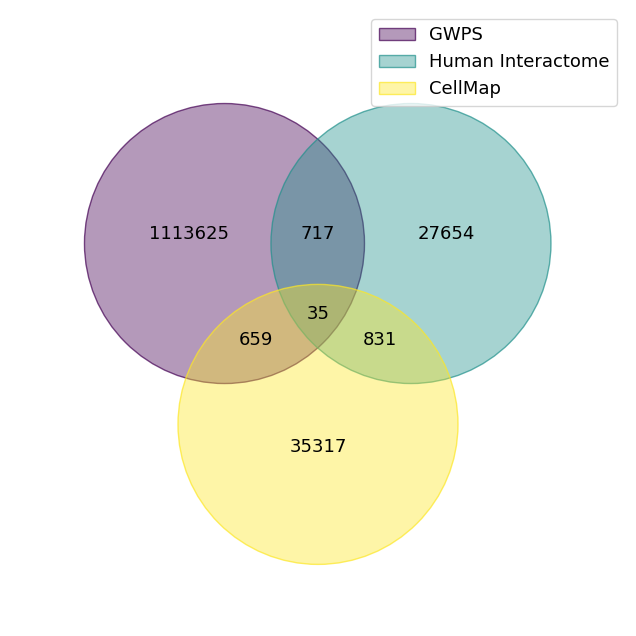

In [ ]:
from venn import venn

# Create a dictionary of sets
sets = {
    #'OmniPath': omni,
    #'CollecTRI': collectri,
    "GWPS": gwps,
    "Human Interactome": humaninter,
    "CellMap": cellmap,
}

venn(sets)

<Axes: >

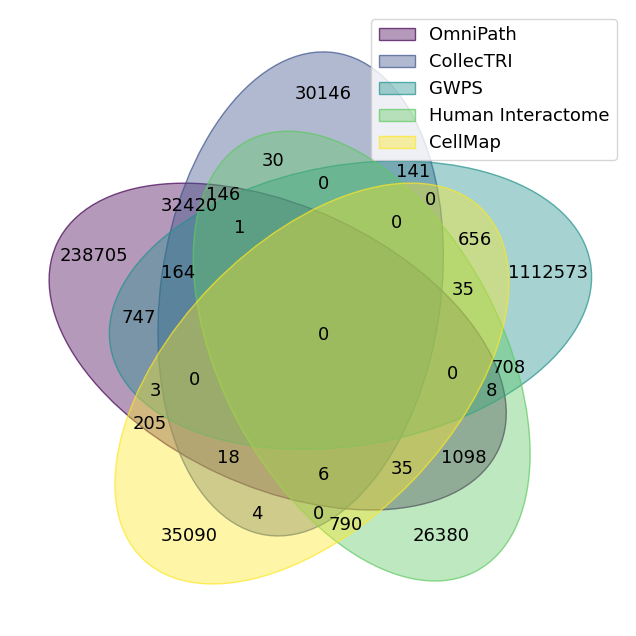

In [ ]:
sets = {
    "OmniPath": omni,
    "CollecTRI": collectri,
    "GWPS": gwps,
    "Human Interactome": humaninter,
    "CellMap": cellmap,
}

venn(sets)

<Axes: >

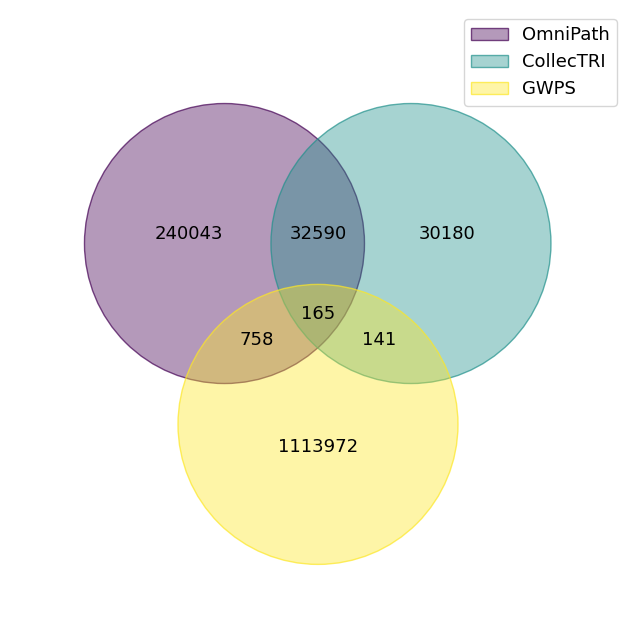

In [ ]:
sets = {
    "OmniPath": omni,
    "CollecTRI": collectri,
    "GWPS": gwps,
    #'Human Interactome': humaninter,
    #'CellMap': cellmap
}

venn(sets)

## predict human interactome network

In [5]:
#! lamin init --storage ./lamin-intro --schema bionty

import scanpy as sc
from huggingface_hub import hf_hub_download

from scprint import scPrint
from scprint.tasks import GNInfer
from scdataloader import Preprocessor

from bengrn import BenGRN
import scanpy as sc
from anndata.utils import make_index_unique

from bengrn.base import train_classifier
from bengrn import compute_genie3
from grnndata import utils as grnutils
import joblib

%load_ext autoreload
%autoreload 2 

import torch

torch.set_float32_matmul_precision("medium")

→ connected lamindb: jkobject/scprint_v2


/home/ml4ig1/Documents code/simpler_flash/src/simpler_flash/layer_norm.py:1044: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/ml4ig1/Documents code/simpler_flash/src/simpler_flash/layer_norm.py:1107: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
model_checkpoint_file = "../../../w937u4o1.ckpt"  # w937u4o1.ckpt"


In [7]:
model = scPrint.load_from_checkpoint(model_checkpoint_file, precpt_gene_emb=None)
model = model.to("cuda")

Gene position encoding has changed in the dataloader compared to last time, trying to revert
FYI: scPrint is not attached to a `Trainer`.


In [8]:
CELLTYPES = ["oligodendrocyte"]

NUM_GENES = 5000
MAXCELLS = 1024
LOC = "../..data/temp/"  #

In [9]:
# only dataset dropped
adata = sc.read(
    LOC + "glio_smart_highdepth" + ".h5ad",
    backup_url="https://datasets.cellxgene.cziscience.com/6ec440b4-542a-4022-ac01-56f812e25593.h5ad",
)

adata.var["isTF"] = False
adata.var.loc[adata.var.feature_name.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 3589 × 22149
    obs: 'Sample.type', 'Selection', 'Location', 'Sample.name', 'Total_reads', 'Unique_reads', 'Unique_reads_percent', 'Splice_sites_total', 'Splice_sites_Annotated', 'Splice_sites_GT.AG', 'Splice_sites_GC.AG', 'Splice_sites_AT.AC', 'Splice_sites_non_canonical', 'Multimapping_reads_percent', 'Unmapped_mismatch', 'Unmapped_short', 'Unmapped_other', 'ERCC_reads', 'Non_ERCC_reads', 'ERCC_to_non_ERCC', 'Genes_detected', 'housekeeping_cluster', 'Cluster_2d', 'Cluster_2d_color', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered'

In [13]:
adata.obs.cell_type.value_counts()

cell_type
myeloid cell                      1842
neoplastic cell                   1079
oligodendrocyte precursor cell     406
astrocyte                           88
oligodendrocyte                     81
vascular lymphangioblast            50
neuron                              21
Name: count, dtype: int64

In [11]:
preprocessor = Preprocessor(force_preprocess=True, skip_validate=True, do_postp=False)
adata = preprocessor(adata.copy())

Dropping layers:  KeysView(Layers with keys: )
checking raw counts
removed 0 non primary cells, 3589 renamining
filtered out 22 cells, 3567 renamining
Removed 7 genes not known to the ontology
Removed 0 duplicate genes
Added 48469 genes in the ontology but not present in the dataset
starting QC
Seeing 71 outliers (1.99% of total dataset):
done
AnnData object with n_obs × n_vars = 3567 × 70611
    obs: 'Sample.type', 'Selection', 'Location', 'Sample.name', 'Total_reads', 'Unique_reads', 'Unique_reads_percent', 'Splice_sites_total', 'Splice_sites_Annotated', 'Splice_sites_GT.AG', 'Splice_sites_GC.AG', 'Splice_sites_AT.AC', 'Splice_sites_non_canonical', 'Multimapping_reads_percent', 'Unmapped_mismatch', 'Unmapped_short', 'Unmapped_other', 'ERCC_reads', 'Non_ERCC_reads', 'ERCC_to_non_ERCC', 'Genes_detected', 'housekeeping_cluster', 'Cluster_2d', 'Cluster_2d_color', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_

In [ ]:
metrics = {}
clf_omni = None
shapes = []
grn_inferer = GNInfer(
    how="most var within",
    preprocess="softmax",
    head_agg="mean",
    filtration="none",
    num_genes=2000,
    max_cells=256,
    num_workers=8,
    batch_size=2,
)
grn = grn_inferer(model, adata[(adata.X.sum(1) > 500)])
grn.var.index = make_index_unique(grn.var["symbol"].astype(str))
#grn.varp["all"] = grn.varp["GRN"]
#grn.varp["GRN"] = grn.varp["GRN"][:, :, :].mean(-1)
#metrics[celltype + "_scprint_mean"] = BenGRN(grn).scprint_benchmark()

number of expressed genes in this cell type: 20704
not on wandb, could not set name


100%|██████████| 128/128 [00:07<00:00, 16.07it/s]
... storing 'biotype' as categorical
... storing 'organism' as categorical


avg link count: 3549456, sparsity: 1.0


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

# collectri

loading GT,  collectri
intersection of 203 genes
intersection pct: 0.10294117647058823
only tf:  False
using only tf:  0.10294117647058823
total true edges:  489.0
precision:  0.011866339877211288 
recall:  1.0 
random precision: 0.011925084134029167


  0%|          | 0/128 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 5878.43it/s]

Average Precision (AP):  0.016321584134016912
Area Under Precision-Recall Curve (AUPRC):  0.015714075673972445
EPR: 2.7437824365070407


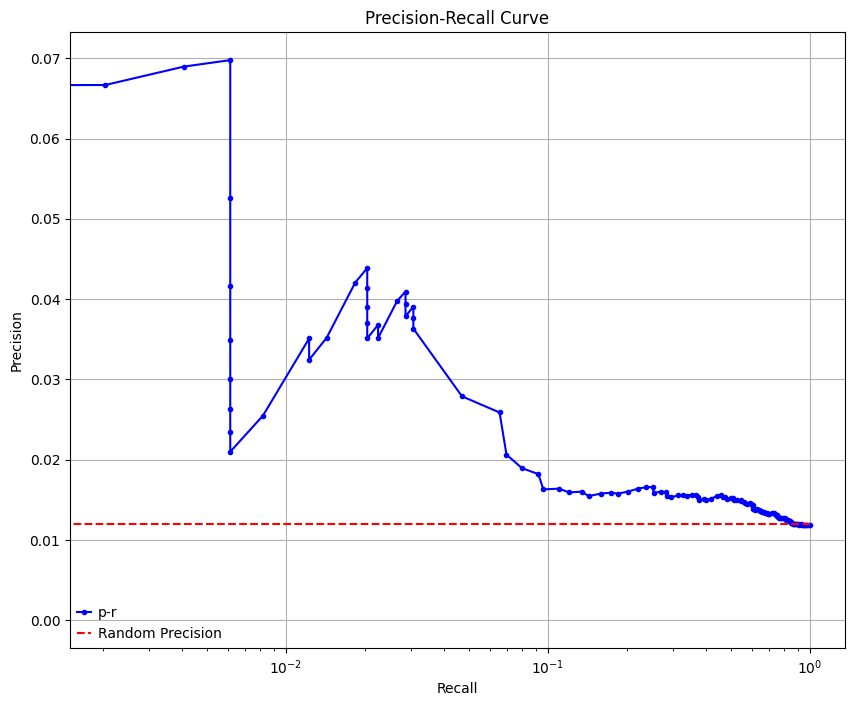

{'precision': np.float64(0.011866339877211288),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.011925084134029167),
 'auprc': np.float64(0.015714075673972445),
 'ap': np.float64(0.016321584134016912),
 'epr': np.float64(2.7437824365070407),
 'odd_ratio': np.float64(2.86375034081411)}

In [43]:
BenGRN(grn).compare_to(to="collectri")

loading GT,  collectri
intersection of 366 genes
intersection pct: 0.09351047521716914
only tf:  False
using only tf:  0.09351047521716914
total true edges:  1440.0
precision:  0.010749798441279226 
recall:  1.0 
random precision: 0.010779249943858073


  0%|          | 0/128 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 1896.00it/s]

Average Precision (AP):  0.012791655920105623
Area Under Precision-Recall Curve (AUPRC):  0.012718409915596307
EPR: 1.8683015046296299


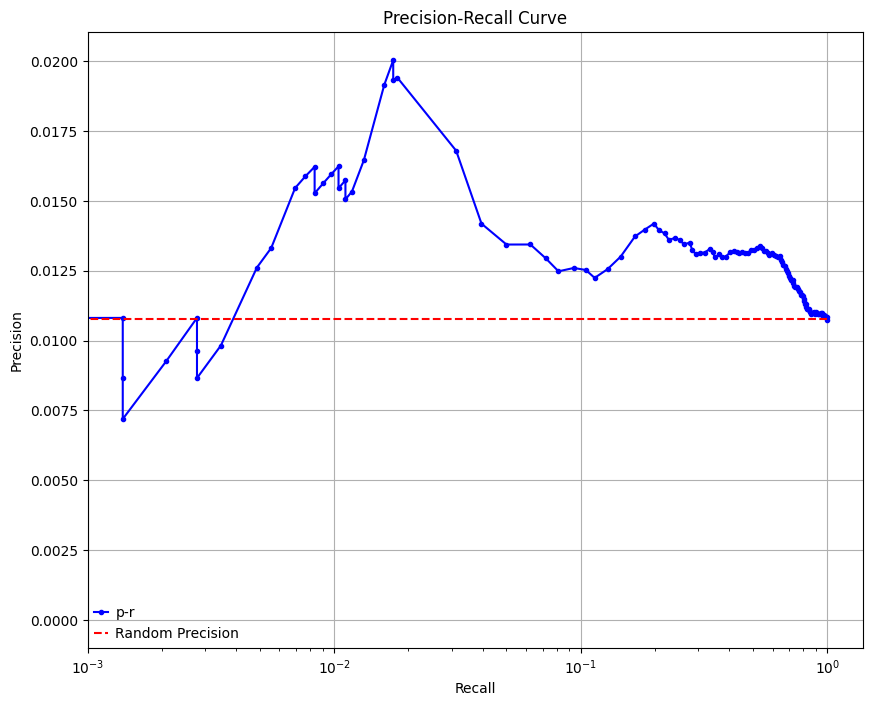

{'precision': np.float64(0.010749798441279226),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.010779249943858073),
 'auprc': np.float64(0.012718409915596307),
 'ap': np.float64(0.012791655920105623),
 'epr': np.float64(1.8683015046296299),
 'odd_ratio': np.float64(1.904360343780592)}

In [28]:
BenGRN(grn).compare_to(to="collectri")

loading GT,  collectri
intersection of 943 genes
intersection pct: 0.10095278878064447
only tf:  False
using only tf:  0.10095278878064447
total true edges:  8286.0
precision:  0.009317975055355698 
recall:  1.0 
random precision: 0.009327866748620408


 77%|███████▋  | 99/128 [00:00<00:00, 319.98it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 318.90it/s]


Average Precision (AP):  0.009914785229135708
Area Under Precision-Recall Curve (AUPRC):  0.009919251545402234
EPR: 1.591394486359568


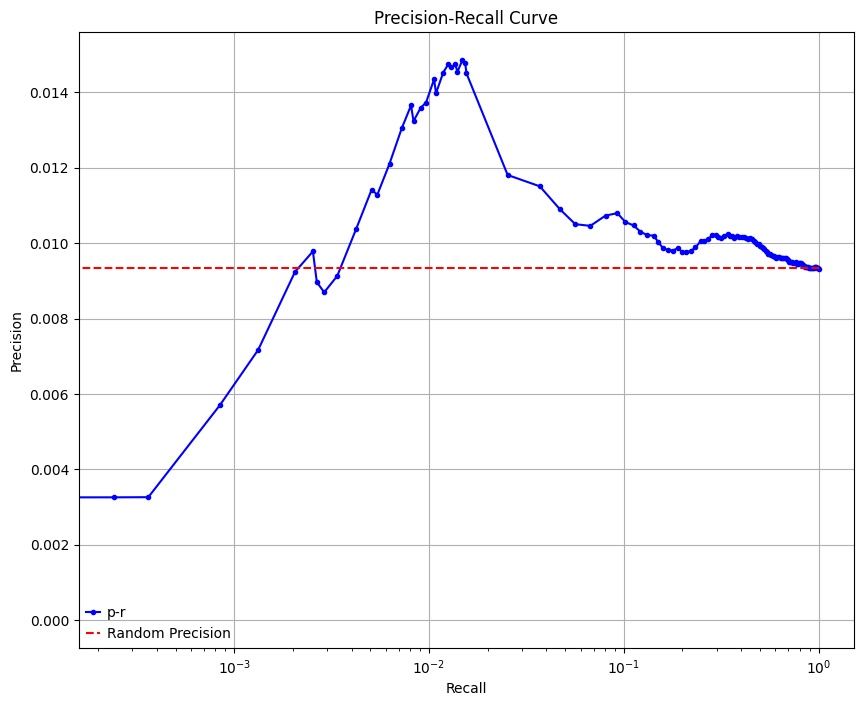

{'precision': np.float64(0.009317975055355698),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.009327866748620408),
 'auprc': np.float64(0.009919251545402234),
 'ap': np.float64(0.009914785229135708),
 'epr': np.float64(1.591394486359568),
 'odd_ratio': np.float64(1.6093510111845999)}

In [13]:
BenGRN(grn).compare_to(to="collectri")

# omni

loading GT,  omnipath
intersection of 771 genes
intersection pct: 0.390973630831643
only tf:  False
using only tf:  0.390973630831643
total true edges:  2218.0
precision:  0.0037312365735203325 
recall:  1.0 
random precision: 0.003736082335304125


 73%|███████▎  | 94/128 [00:00<00:00, 938.03it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 924.52it/s]

Average Precision (AP):  0.005036905773216401
Area Under Precision-Recall Curve (AUPRC):  0.004910304496907936
EPR: 2.534202496013842


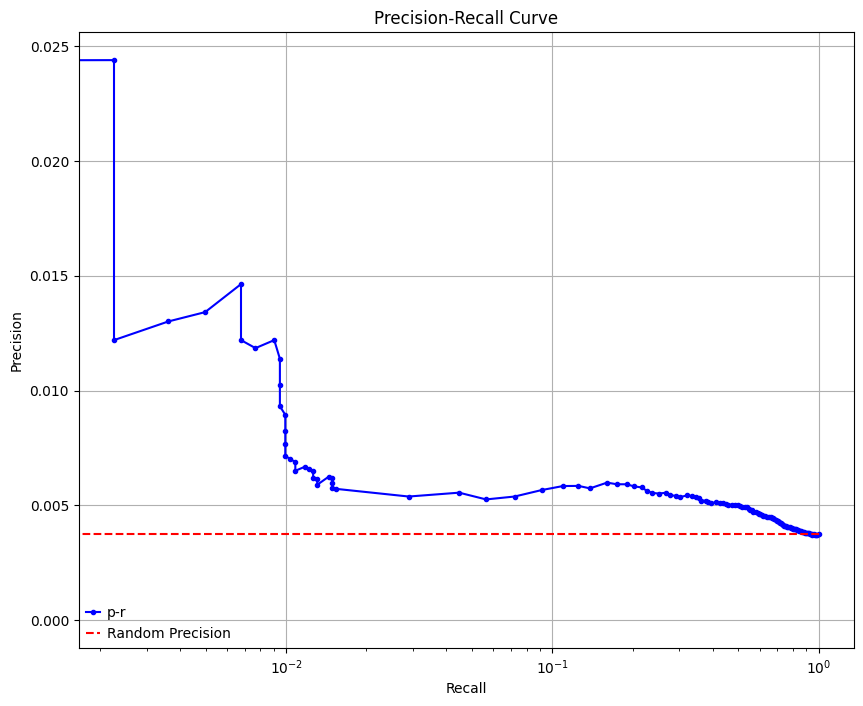

{'precision': np.float64(0.0037312365735203325),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.003736082335304125),
 'auprc': np.float64(0.004910304496907936),
 'ap': np.float64(0.005036905773216401),
 'epr': np.float64(2.534202496013842),
 'odd_ratio': np.float64(2.5636719828773007)}

In [44]:
BenGRN(grn).compare_to(to="omnipath")

loading GT,  omnipath
intersection of 1428 genes
intersection pct: 0.36484414920797137
only tf:  False
using only tf:  0.36484414920797137
total true edges:  7007.0
precision:  0.0034361783929257976 
recall:  1.0 
random precision: 0.0034385863665718566


 91%|█████████▏| 117/128 [00:00<00:00, 287.72it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 285.86it/s]


Average Precision (AP):  0.00413552331572641
Area Under Precision-Recall Curve (AUPRC):  0.004123564696068507
EPR: 2.241205633242168


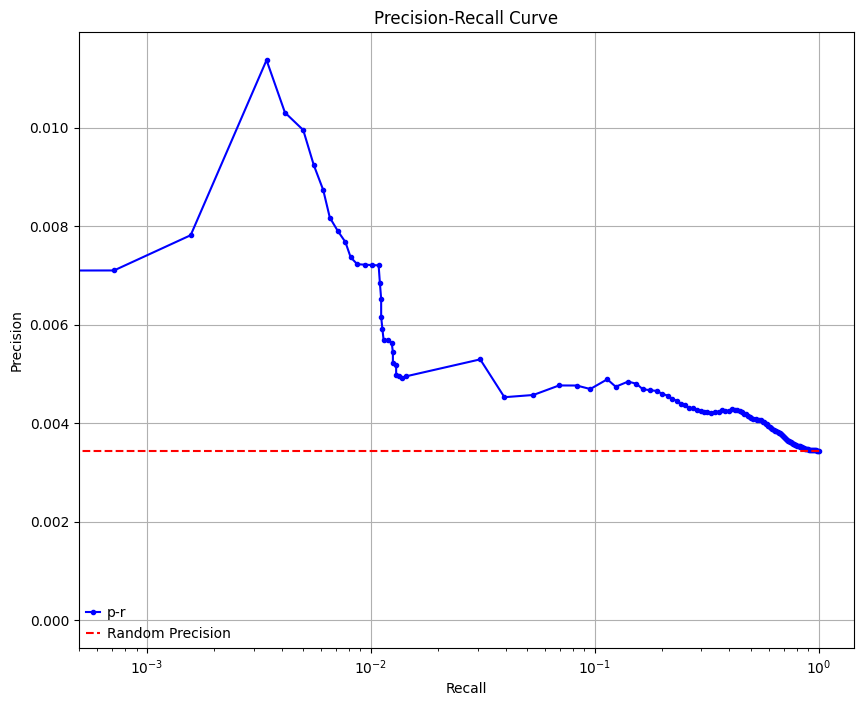

{'precision': np.float64(0.0034361783929257976),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.0034385863665718566),
 'auprc': np.float64(0.004123564696068507),
 'ap': np.float64(0.00413552331572641),
 'epr': np.float64(2.241205633242168),
 'odd_ratio': np.float64(2.260559977307727)}

In [30]:
BenGRN(grn).compare_to(to="omnipath")

loading GT,  omnipath
intersection of 3421 genes
intersection pct: 0.3662348784926667
only tf:  False
using only tf:  0.3662348784926667
total true edges:  33703.0
precision:  0.00287980056122915 
recall:  1.0 
random precision: 0.002880642608176878


 98%|█████████▊| 125/128 [00:02<00:00, 47.66it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.22it/s]


Average Precision (AP):  0.003208214975541691
Area Under Precision-Recall Curve (AUPRC):  0.0032071645586076386
EPR: 1.730419263752517


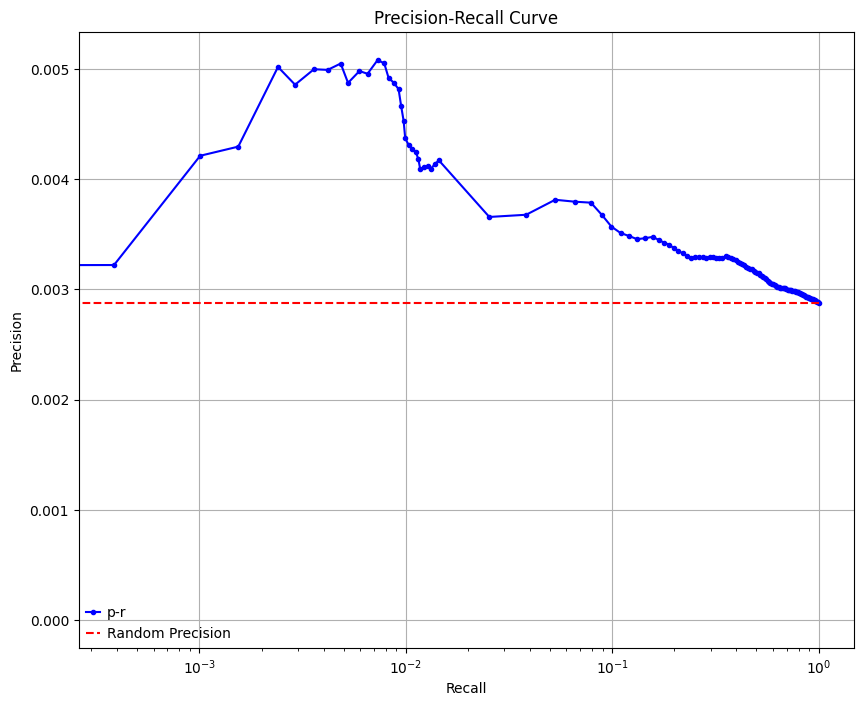

{'precision': np.float64(0.00287980056122915),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.002880642608176878),
 'auprc': np.float64(0.0032071645586076386),
 'ap': np.float64(0.003208214975541691),
 'epr': np.float64(1.730419263752517),
 'odd_ratio': np.float64(1.7377559452504832)}

In [14]:
BenGRN(grn).compare_to(to="omnipath")

In [15]:
from scdataloader.utils import load_genes
import anndata as ad
import pandas as pd
import bionty as bt
from grnndata import from_adata_and_longform

# Load gene names
genes = load_genes("NCBITaxon:9606")

# Create empty anndata with gene names
empty_adata = ad.AnnData(X=np.zeros((1, len(genes))), var=genes)
print(f"Created empty AnnData with {len(genes)} genes")
empty_adata.var["ensembl_id"] = empty_adata.var.index
empty_adata.var.set_index("symbol", inplace=True, drop=False)
empty_adata


Created empty AnnData with 70611 genes


AnnData object with n_obs × n_vars = 1 × 70611
    var: 'uid', 'symbol', 'biotype', 'organism_id', 'branch_id', 'mt', 'ribo', 'hb', 'organism', 'ensembl_id'

In [16]:
gt_cm = from_adata_and_longform(empty_adata, cellmap.iloc[:, [2, 4]])

100%|██████████| 36842/36842 [00:18<00:00, 1986.70it/s]


precision:  0.0011026079481213616 
recall:  1.0 
random precision: 0.0011031181785462211


 55%|█████▍    | 70/128 [00:00<00:00, 696.00it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 786.51it/s]


Average Precision (AP):  0.0011248316442983935
Area Under Precision-Recall Curve (AUPRC):  0.0011165222186898843
EPR: 1.280397155989658


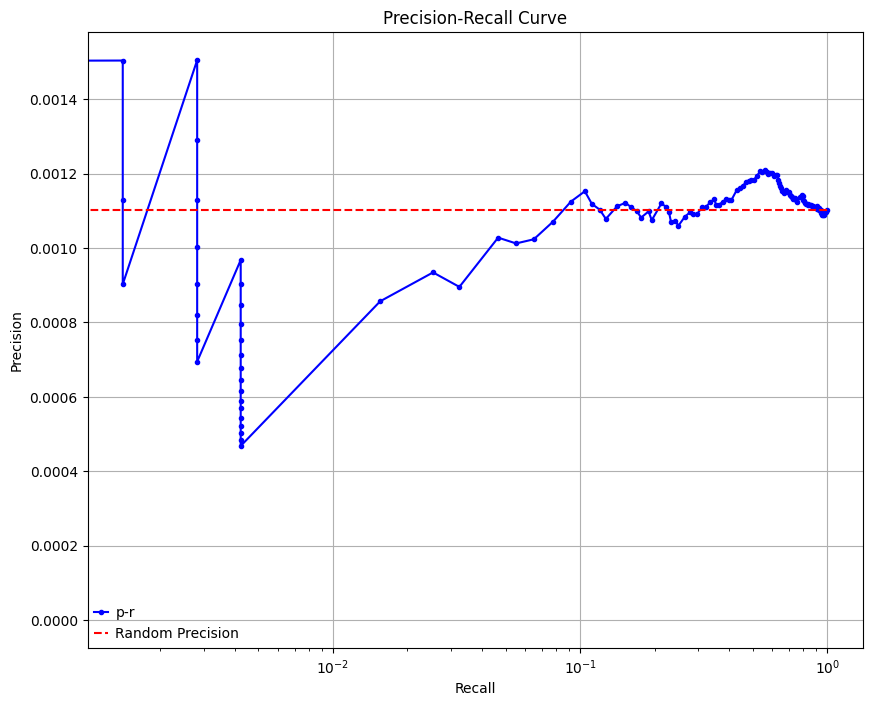

{'precision': np.float64(0.0011026079481213616),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.0011031181785462211),
 'auprc': np.float64(0.0011165222186898843),
 'ap': np.float64(0.0011248316442983935),
 'epr': np.float64(1.280397155989658),
 'odd_ratio': np.float64(1.2811909196577367)}

In [45]:
BenGRN(grn).compare_to(gt_cm)

precision:  0.0011638422396718952 
recall:  1.0 
random precision: 0.001164112837728085


 84%|████████▎ | 107/128 [00:00<00:00, 231.32it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 215.13it/s]


Average Precision (AP):  0.001132185453804988
Area Under Precision-Recall Curve (AUPRC):  0.0011310792875834168
No true positives found. Returning EPR as 0.
EPR: 0.0


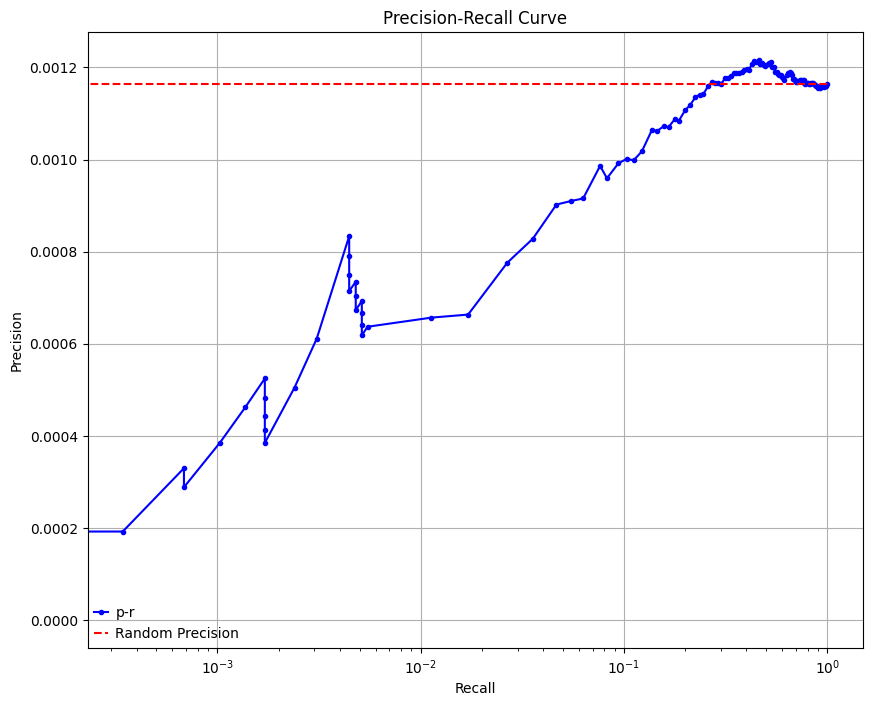

{'precision': np.float64(0.0011638422396718952),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.001164112837728085),
 'auprc': np.float64(0.0011310792875834168),
 'ap': np.float64(0.001132185453804988),
 'epr': np.float64(0.0),
 'odd_ratio': np.float64(0.0)}

In [ ]:
BenGRN(grn).compare_to(gt_cm)

precision:  0.0008851160610375918 
recall:  1.0 
random precision: 0.0008852006882544421


 98%|█████████▊| 125/128 [00:02<00:00, 44.44it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.05it/s]


Average Precision (AP):  0.0008762187499017448
Area Under Precision-Recall Curve (AUPRC):  0.0008759850235261276
EPR: 0.188737336514682


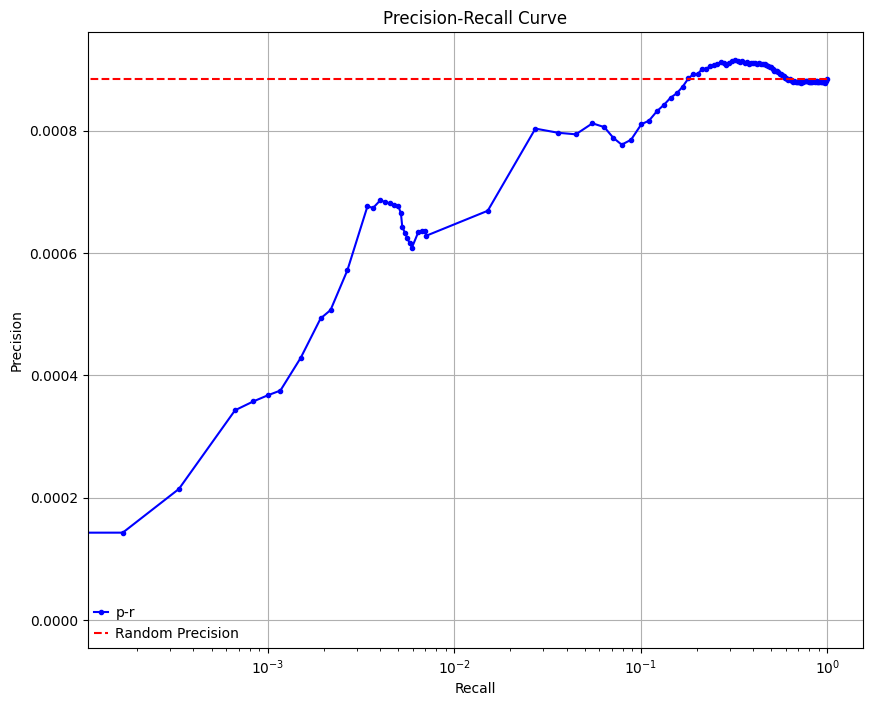

{'precision': np.float64(0.0008851160610375918),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.0008852006882544421),
 'auprc': np.float64(0.0008759850235261276),
 'ap': np.float64(0.0008762187499017448),
 'epr': np.float64(0.188737336514682),
 'odd_ratio': np.float64(0.18846619257824407)}

In [17]:
BenGRN(grn).compare_to(gt_cm)

# human inter

In [18]:
gt_inter = from_adata_and_longform(empty_adata, humaninter.iloc[:, 2:4])

  0%|          | 0/29246 [00:00<?, ?it/s]

100%|██████████| 29246/29246 [00:28<00:00, 1024.45it/s]


precision:  0.00023438415563107934 
recall:  1.0 
random precision: 0.00023449261660082996


 88%|████████▊ | 112/128 [00:00<00:00, 267.82it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 269.00it/s]


Average Precision (AP):  0.00025322727014691587
Area Under Precision-Recall Curve (AUPRC):  0.0002508578592776395
No true positives found. Returning EPR as 0.
EPR: 0.0


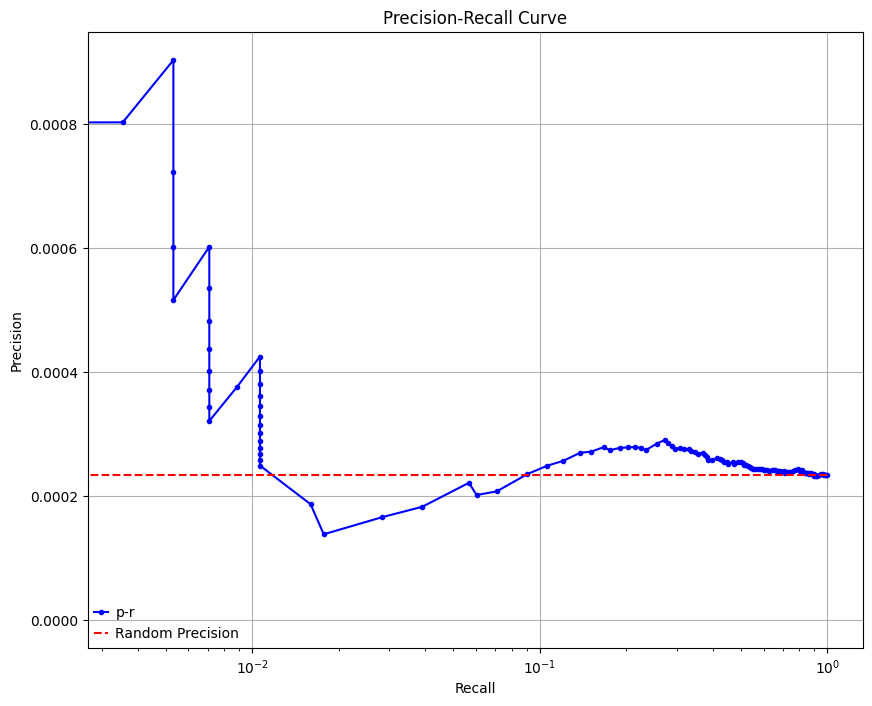

{'precision': np.float64(0.00023438415563107934),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.00023449261660082996),
 'auprc': np.float64(0.0002508578592776395),
 'ap': np.float64(0.00025322727014691587),
 'epr': np.float64(0.0),
 'odd_ratio': np.float64(0.0)}

In [46]:
BenGRN(grn).compare_to(gt_inter)

precision:  0.0002023945869519759 
recall:  1.0 
random precision: 0.0002024416445169496


 98%|█████████▊| 126/128 [00:01<00:00, 69.02it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 68.41it/s]


Average Precision (AP):  0.00021330936100142785
Area Under Precision-Recall Curve (AUPRC):  0.00021277646355680476
No true positives found. Returning EPR as 0.
EPR: 0.0


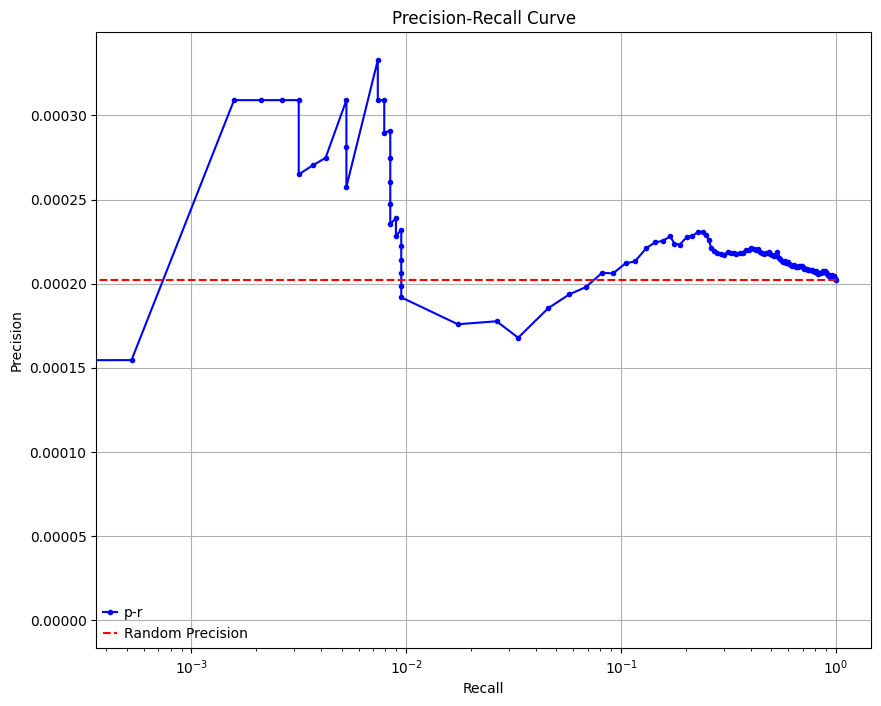

{'precision': np.float64(0.0002023945869519759),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.0002024416445169496),
 'auprc': np.float64(0.00021277646355680476),
 'ap': np.float64(0.00021330936100142785),
 'epr': np.float64(0.0),
 'odd_ratio': np.float64(0.0)}

In [41]:
BenGRN(grn).compare_to(gt_inter)

precision:  0.00016078214262664874 
recall:  1.0 
random precision: 0.00016079751523804818


 99%|█████████▉| 127/128 [00:23<00:00,  6.01it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Average Precision (AP):  0.00017348068115757547
Area Under Precision-Recall Curve (AUPRC):  0.0001734334738857995
No true positives found. Returning EPR as 0.
EPR: 0.0


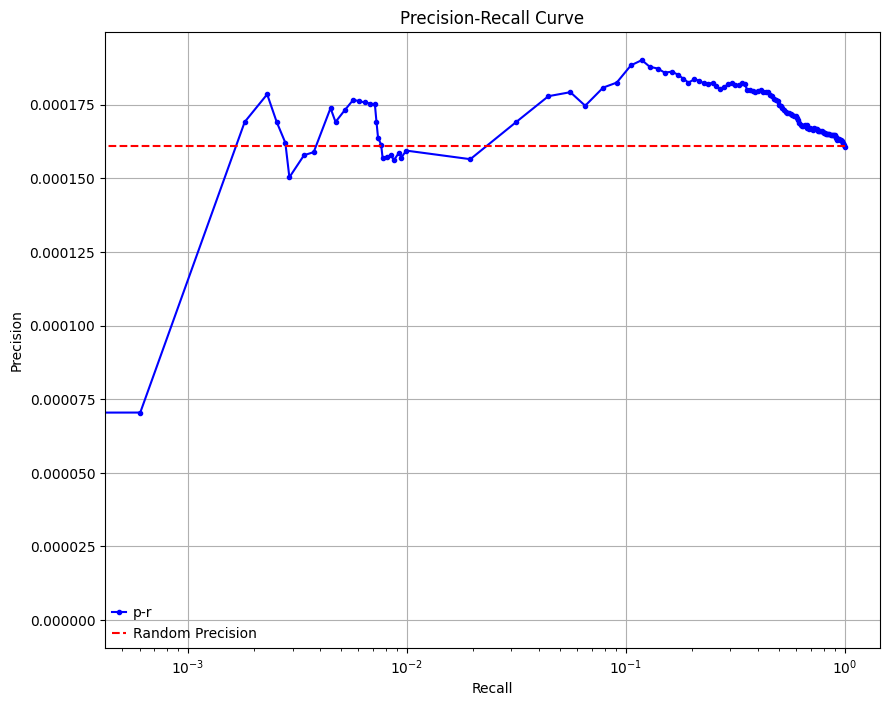

{'precision': np.float64(0.00016078214262664874),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.00016079751523804818),
 'auprc': np.float64(0.0001734334738857995),
 'ap': np.float64(0.00017348068115757547),
 'epr': np.float64(0.0),
 'odd_ratio': np.float64(0.0)}

In [19]:
BenGRN(grn).compare_to(gt_inter)

# gwps

precision:  0.0203154928641814 
recall:  1.0 
random precision: 0.020329532596637643


 93%|█████████▎| 119/128 [00:00<00:00, 147.91it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 146.64it/s]


Average Precision (AP):  0.020732155249280293
Area Under Precision-Recall Curve (AUPRC):  0.02074651270591024
EPR: 1.2549544353439557


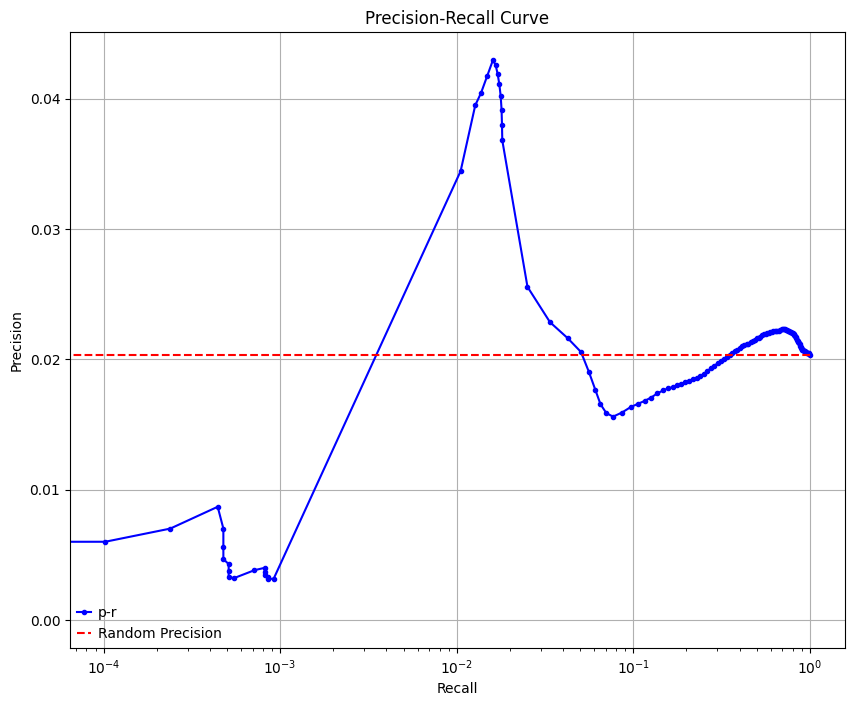

{'precision': np.float64(0.0203154928641814),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.020329532596637643),
 'auprc': np.float64(0.02074651270591024),
 'ap': np.float64(0.020732155249280293),
 'epr': np.float64(1.2549544353439557),
 'odd_ratio': np.float64(1.2684788930009936)}

In [47]:
BenGRN(grn).compare_to(gwps)

precision:  0.020679655907278324 
recall:  1.0 
random precision: 0.02068737795952152


 97%|█████████▋| 124/128 [00:02<00:00, 78.65it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.79it/s]


Average Precision (AP):  0.019520375703784065
Area Under Precision-Recall Curve (AUPRC):  0.019513763752855663
EPR: 0.5019264777761


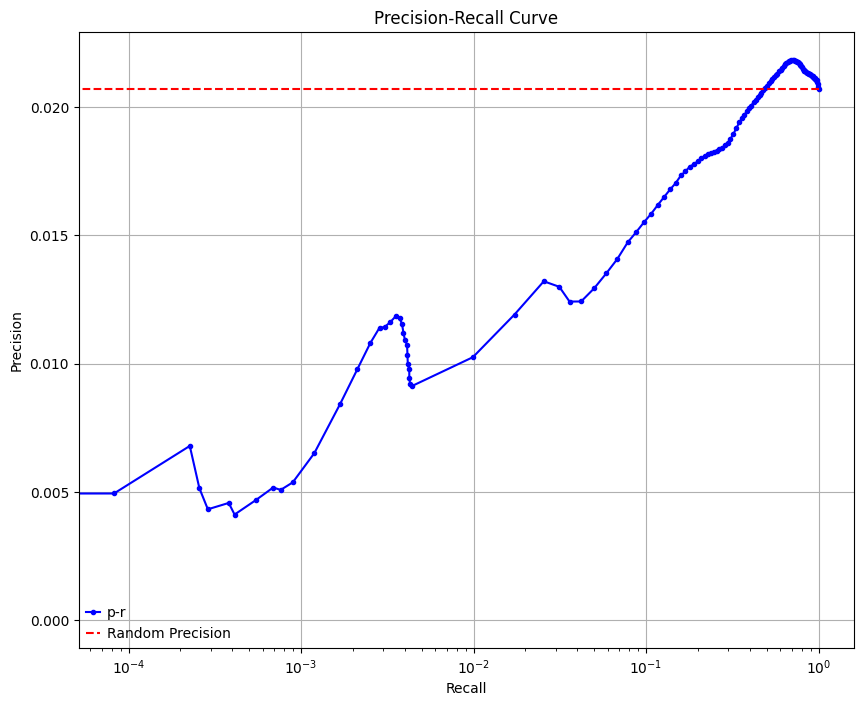

{'precision': np.float64(0.020679655907278324),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.02068737795952152),
 'auprc': np.float64(0.019513763752855663),
 'ap': np.float64(0.019520375703784065),
 'epr': np.float64(0.5019264777761),
 'odd_ratio': np.float64(0.491419578784964)}

In [26]:
BenGRN(grn).compare_to(gwps)

precision:  0.020112836327795744 
recall:  1.0 
random precision: 0.020116829346721255


 98%|█████████▊| 126/128 [00:05<00:00, 21.90it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


Average Precision (AP):  0.019877121000110274
Area Under Precision-Recall Curve (AUPRC):  0.01987854292422878
EPR: 0.8888603709836128


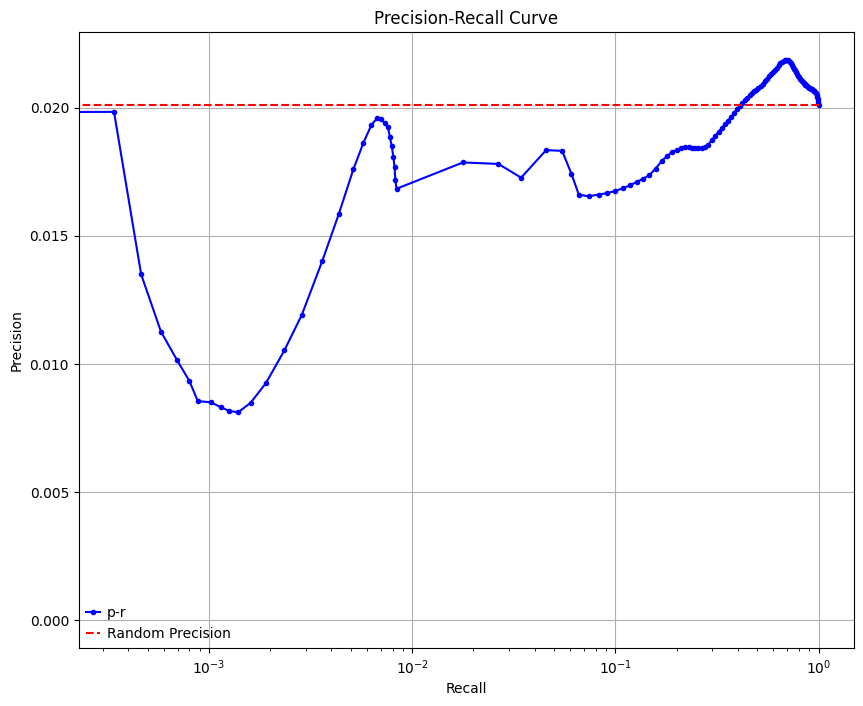

{'precision': np.float64(0.020112836327795744),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.020116829346721255),
 'auprc': np.float64(0.01987854292422878),
 'ap': np.float64(0.019877121000110274),
 'epr': np.float64(0.8888603709836128),
 'odd_ratio': np.float64(0.8847765795662055)}

In [20]:
BenGRN(grn).compare_to(gwps)

# other

precision:  0.001148767078244344 
recall:  1.0 
random precision: 0.0011491225136027116


100%|██████████| 128/128 [00:00<00:00, 479.10it/s]


Average Precision (AP):  0.0010514787764140496
Area Under Precision-Recall Curve (AUPRC):  0.0010500816571582287
EPR: 1.0555977658409303


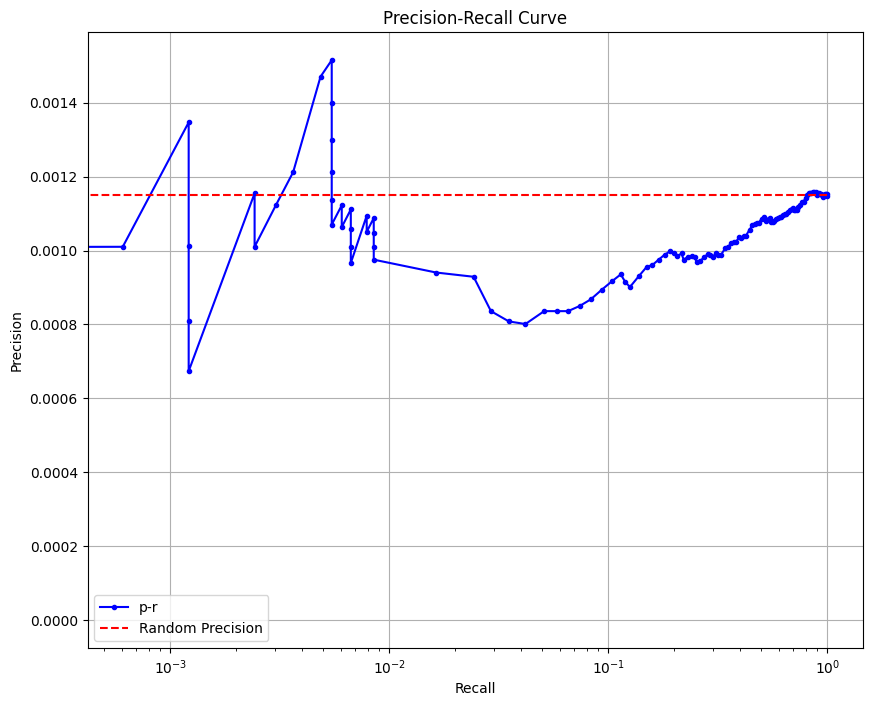

{'precision': 0.001148767078244344,
 'recall': 1.0,
 'rand_precision': 0.0011491225136027116,
 'auprc': 0.0010500816571582287,
 'ap': 0.0010514787764140496,
 'epr': 1.0555977658409303}

In [66]:
BenGRN(grn).compare_to(gt_cm)

precision:  0.00020743278754726543 
recall:  1.0 
random precision: 0.00020749696848400655


100%|██████████| 128/128 [00:01<00:00, 116.41it/s]


Average Precision (AP):  0.0002308226234513565
Area Under Precision-Recall Curve (AUPRC):  0.00022886212714395422
EPR: 0.0


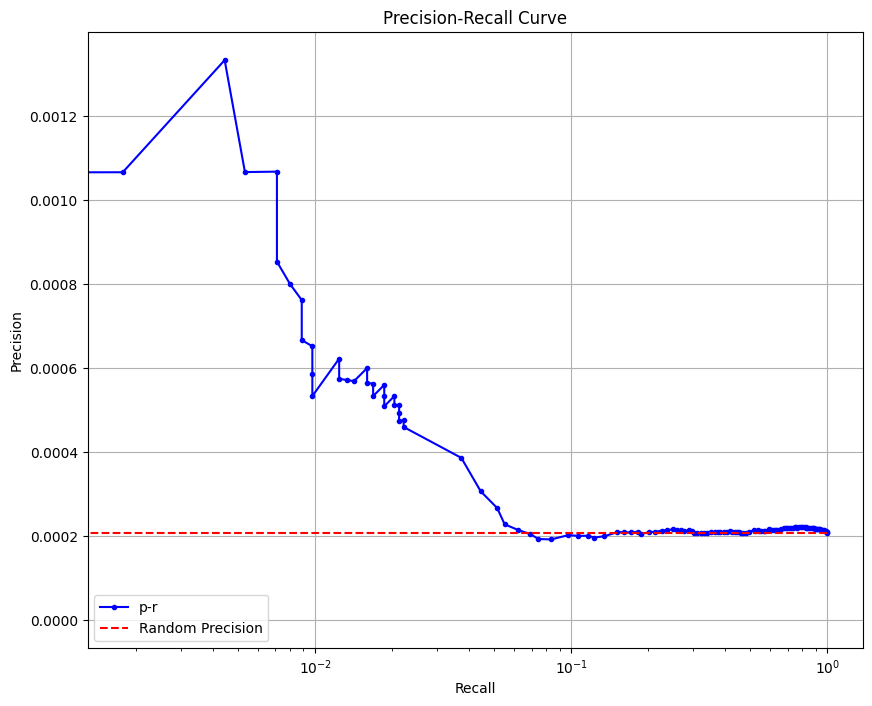

{'precision': 0.00020743278754726543,
 'recall': 1.0,
 'rand_precision': 0.00020749696848400655,
 'auprc': 0.00022886212714395422,
 'ap': 0.0002308226234513565,
 'epr': 0.0}

In [57]:
BenGRN(grn).compare_to(gt_inter)

# J look at nodes that stay the same across similar cells, different cell types (HOW??), species (human / mouse / chimp) (select a module of ~15 genes

precision:  0.00022273417839345494 
recall:  1.0 
random precision: 0.000222839990354687


 84%|████████▎ | 107/128 [00:00<00:00, 344.63it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 345.82it/s]


Average Precision (AP):  0.00032003429992518556
Area Under Precision-Recall Curve (AUPRC):  0.0003159092472864749
No true positives found. Returning EPR as 0.
EPR: 0.0


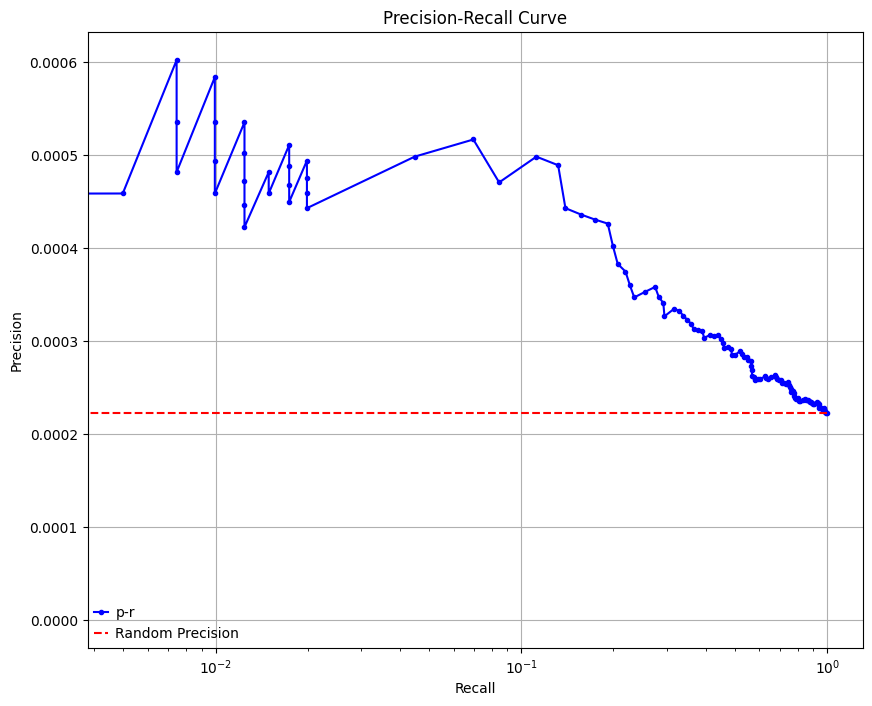

{'precision': np.float64(0.00022273417839345494),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.000222839990354687),
 'auprc': np.float64(0.0003159092472864749),
 'ap': np.float64(0.00032003429992518556),
 'epr': np.float64(0.0),
 'odd_ratio': np.float64(0.0)}

In [25]:
BenGRN(grn).compare_to(gt_inter)

loading GT,  omnipath
intersection of 790 genes
intersection pct: 0.4195432819968136
only tf:  False
using only tf:  0.4195432819968136
total true edges:  1121.0
precision:  0.0017961865085723441 
recall:  1.0 
random precision: 0.0017984630440711685


 77%|███████▋  | 99/128 [00:00<00:00, 983.23it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 966.35it/s]

Average Precision (AP):  0.0021283642056734832
Area Under Precision-Recall Curve (AUPRC):  0.0021183090275463928
EPR: 1.9840511331398545


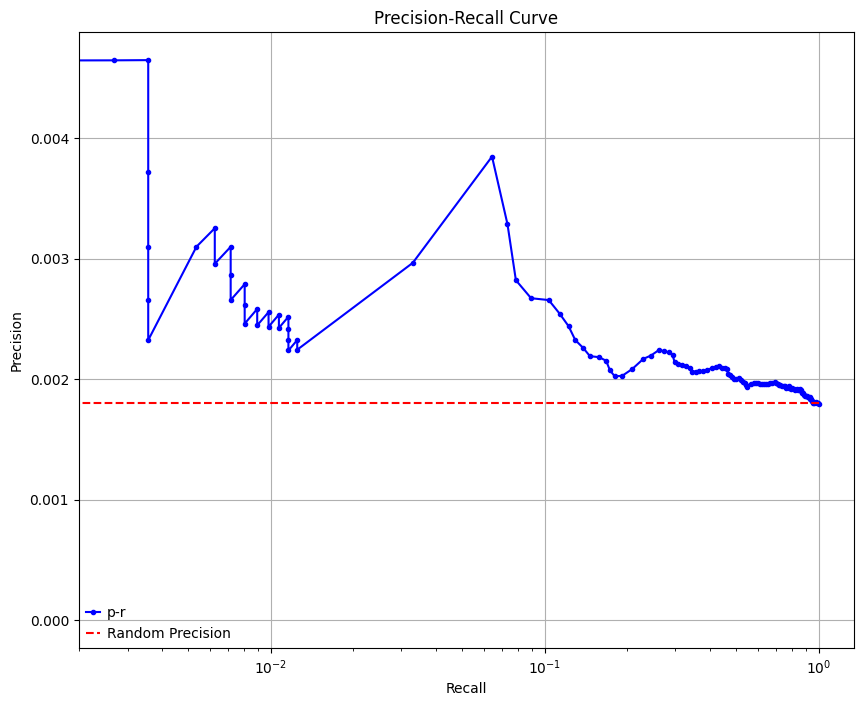

{'precision': np.float64(0.0017961865085723441),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.0017984630440711685),
 'auprc': np.float64(0.0021183090275463928),
 'ap': np.float64(0.0021283642056734832),
 'epr': np.float64(1.9840511331398545),
 'odd_ratio': np.float64(1.9911115670651902)}

In [23]:
BenGRN(grn).compare_to(to="omnipath")

loading GT,  collectri
intersection of 372 genes
intersection pct: 0.1975570897503983
only tf:  False
using only tf:  0.1975570897503983
total true edges:  301.0
precision:  0.002175106948780206 
recall:  1.0 
random precision: 0.002180969770744573


  0%|          | 0/128 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:908: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 1421.72it/s]

Average Precision (AP):  0.002239779471848429
Area Under Precision-Recall Curve (AUPRC):  0.002219862624574867
No true positives found. Returning EPR as 0.
EPR: 0.0


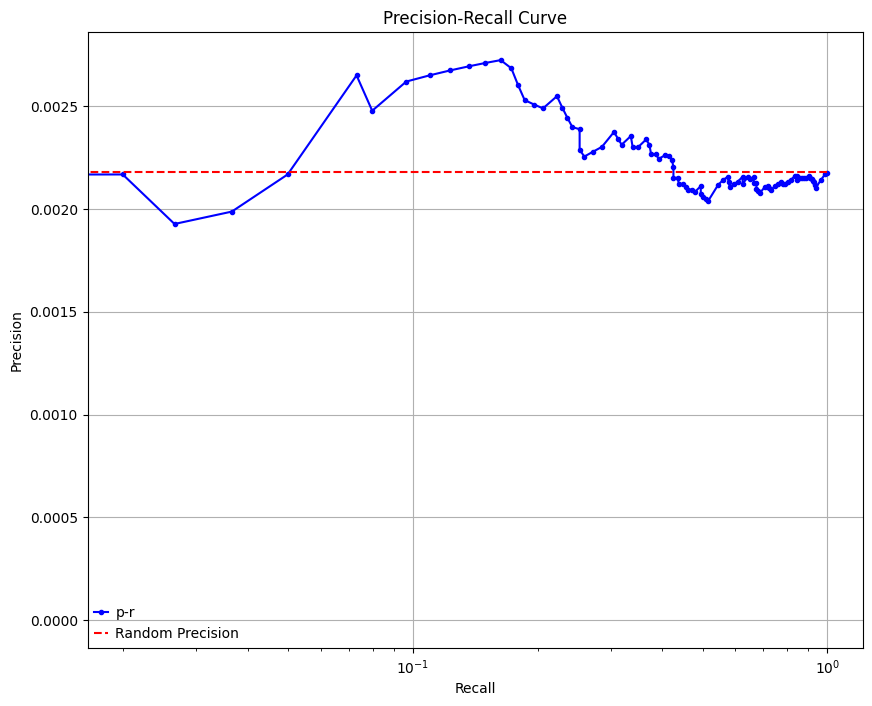

{'precision': np.float64(0.002175106948780206),
 'recall': np.float64(1.0),
 'rand_precision': np.float64(0.002180969770744573),
 'auprc': np.float64(0.002219862624574867),
 'ap': np.float64(0.002239779471848429),
 'epr': np.float64(0.0),
 'odd_ratio': np.float64(0.0)}

In [22]:
BenGRN(grn).compare_to(to="collectri")

In [17]:
adata[adata.X.sum(1) > 500]

View of AnnData object with n_obs × n_vars = 3562 × 70611
    obs: 'Sample.type', 'Selection', 'Location', 'Sample.name', 'Total_reads', 'Unique_reads', 'Unique_reads_percent', 'Splice_sites_total', 'Splice_sites_Annotated', 'Splice_sites_GT.AG', 'Splice_sites_GC.AG', 'Splice_sites_AT.AC', 'Splice_sites_non_canonical', 'Multimapping_reads_percent', 'Unmapped_mismatch', 'Unmapped_short', 'Unmapped_other', 'ERCC_reads', 'Non_ERCC_reads', 'ERCC_to_non_ERCC', 'Genes_detected', 'housekeeping_cluster', 'Cluster_2d', 'Cluster_2d_color', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'nnz', 'n_genes', 'n_

In [18]:
celltype

'oligodendrocyte'

In [16]:
metrics = {}
clf_omni = None
shapes = []
for celltype in CELLTYPES:
    grn_inferer = GNInfer(
        how="most var within",
        preprocess="softmax",
        head_agg="none",
        filtration="none",
        num_genes=10000,
        max_cells=64,
        num_workers=8,
        batch_size=4,
    )
    grn = grn_inferer(model, adata[adata.X.sum(1) > 500], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var["symbol"].astype(str))
    grn.varp["all"] = grn.varp["GRN"]
    grn.varp["GRN"] = grn.varp["GRN"][:, :, :].mean(-1)
    break
    # metrics[celltype + "_scprint_mean"] = BenGRN(grn).scprint_benchmark()

number of expressed genes in this cell type: 12951


AttributeError: 'GNInfer' object has no attribute 'doplot'

base enrichment
too many genes for central computation


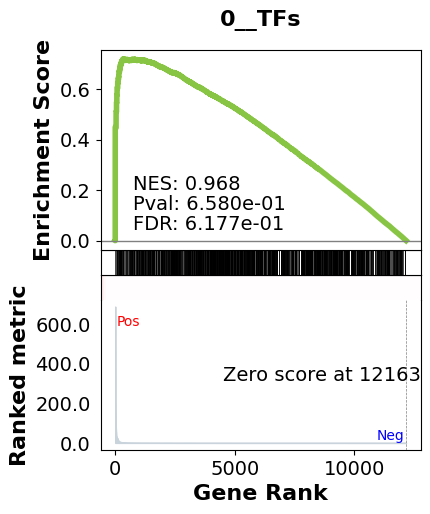

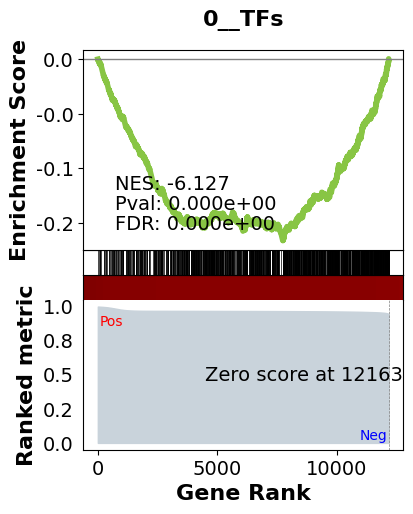

_________________________________________
TF specific enrichment
found some significant results for  51.61290322580645 % TFs

_________________________________________
loading GT,  omnipath
intersection of 4503 genes
intersection pct: 0.3701907267346268
only tf:  False
using only tf:  0.3701907267346268
total true edges:  55538.0
precision:  0.002738964114480592 
recall:  1.0 
random precision: 0.0027395725027779005


100%|██████████| 128/128 [00:04<00:00, 28.45it/s]


Average Precision (AP):  0.002967948073243567
Area Under Precision-Recall Curve (AUPRC):  0.002965242441940204
EPR: 1.4561332820095705


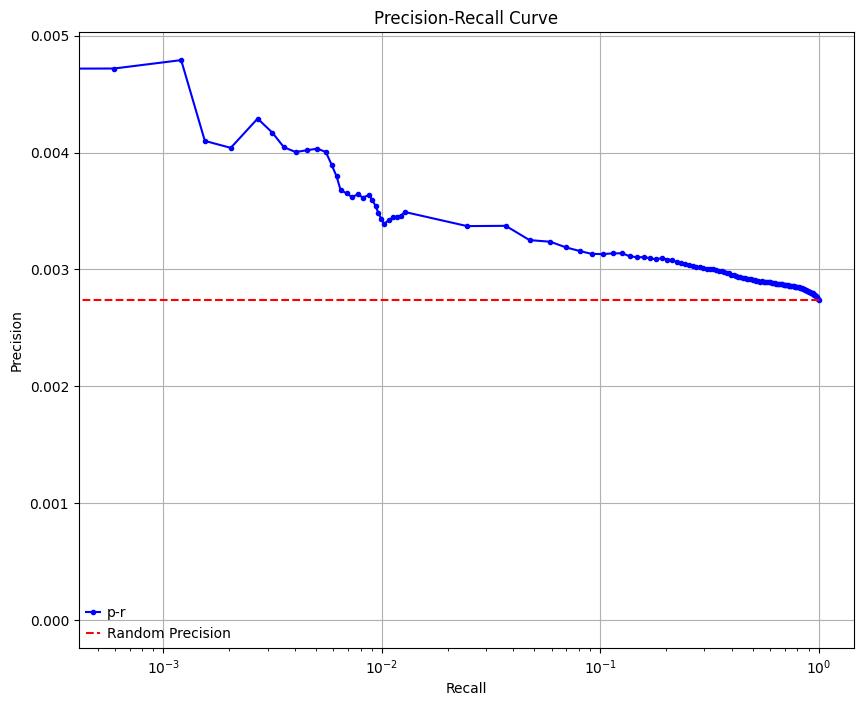

{'TF_enr': True,
 'enriched_terms_Targets': ['celltype.gmt__Oligodendrocytes',
  'celltype.gmt__Hepatocytes',
  'celltype.gmt__Enterocytes',
  'celltype.gmt__Immune system cells',
  'celltype.gmt__Non-classical monocytes',
  'celltype.gmt__Hepatic stellate cells',
  'celltype.gmt__Retinal progenitor cells',
  'celltype.gmt__Pancreatic stellate cells',
  'celltype.gmt__Kupffer cells',
  'celltype.gmt__Airway goblet cells',
  'celltype.gmt__Hepatoblasts',
  'celltype.gmt__Neutrophils',
  'celltype.gmt__Granulocytes',
  'celltype.gmt__Ductal cells',
  'celltype.gmt__Neuroepithelial cells',
  'celltype.gmt__Fibroblasts',
  'celltype.gmt__Glial cells',
  'celltype.gmt__Enterochromaffin cells',
  'celltype.gmt__Memory CD4+ T cells',
  'celltype.gmt__Progenitor cells',
  'celltype.gmt__Intermediate monocytes',
  'celltype.gmt__Basal cells (Airway progenitor cells)',
  'celltype.gmt__Microglial cells',
  'celltype.gmt__Acinar cells',
  'celltype.gmt__Mast cells',
  'celltype.gmt__Alveolar macr

: 

In [ ]:
BenGRN(grn).scprint_benchmark()

loading GT,  collectri
intersection of 1191 genes
intersection pct: 0.09791187109503453
only tf:  False
using only tf:  0.09791187109503453
total true edges:  12826.0
precision:  0.009042066830644895 
recall:  1.0 
random precision: 0.009049665206132831


100%|██████████| 128/128 [00:00<00:00, 373.23it/s]


Average Precision (AP):  0.009658661585757152
Area Under Precision-Recall Curve (AUPRC):  0.0096526120457727
EPR: 1.3258872210578294


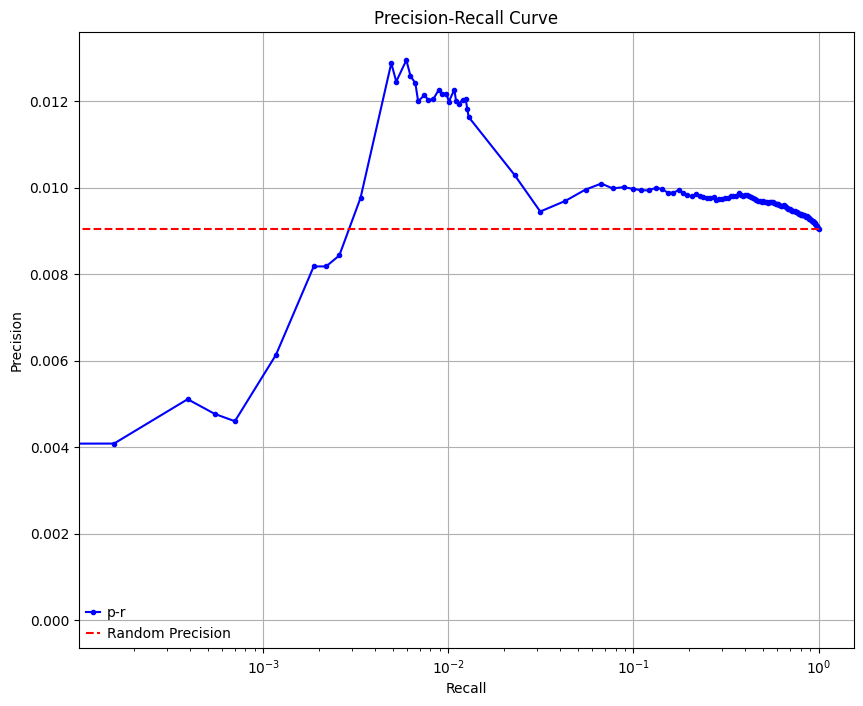

precision:  0.00017526031492823507 
recall:  1.0 
random precision: 0.00017527318468259903


100%|██████████| 128/128 [00:20<00:00,  6.17it/s]


Average Precision (AP):  0.00018174779158059082
Area Under Precision-Recall Curve (AUPRC):  0.00018148305658510945
EPR: 1.8251981047142034


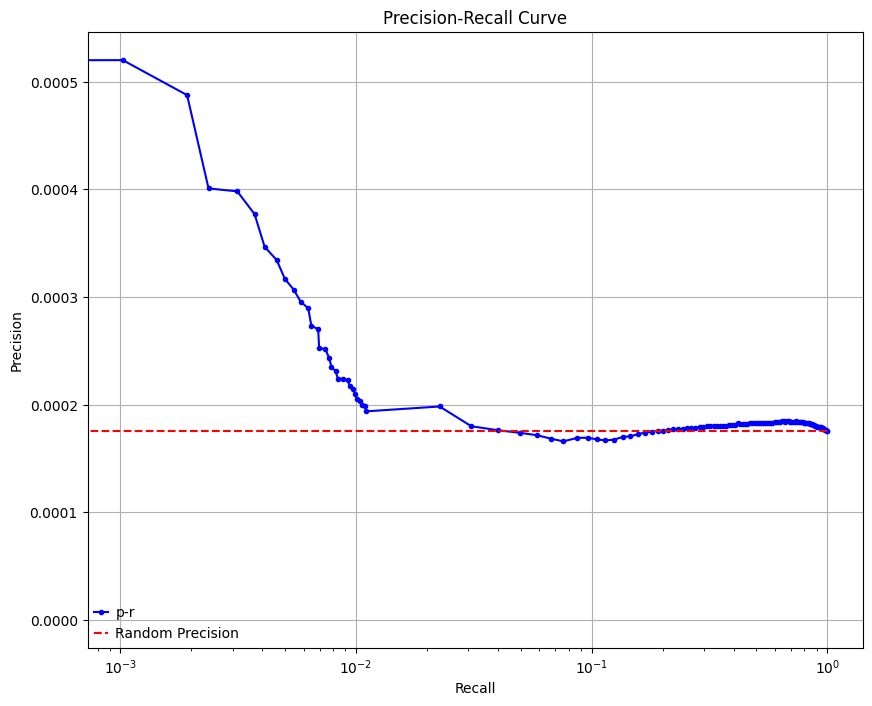

In [ ]:
BenGRN(grn).compare_to(to="collectri")
BenGRN(grn).compare_to(gt_inter)
BenGRN(grn).compare_to(gt_cm)

loading GT,  collectri
intersection of 789 genes
intersection pct: 0.10637724147229338
only tf:  False
using only tf:  0.10637724147229338
total true edges:  5853.0
precision:  0.009402092459531485 
recall:  1.0 
random precision: 0.009414024048947135


100%|██████████| 128/128 [00:00<00:00, 470.15it/s]


Average Precision (AP):  0.010856435260115573
Area Under Precision-Recall Curve (AUPRC):  0.010841306239007198
EPR: 1.7672397008494904


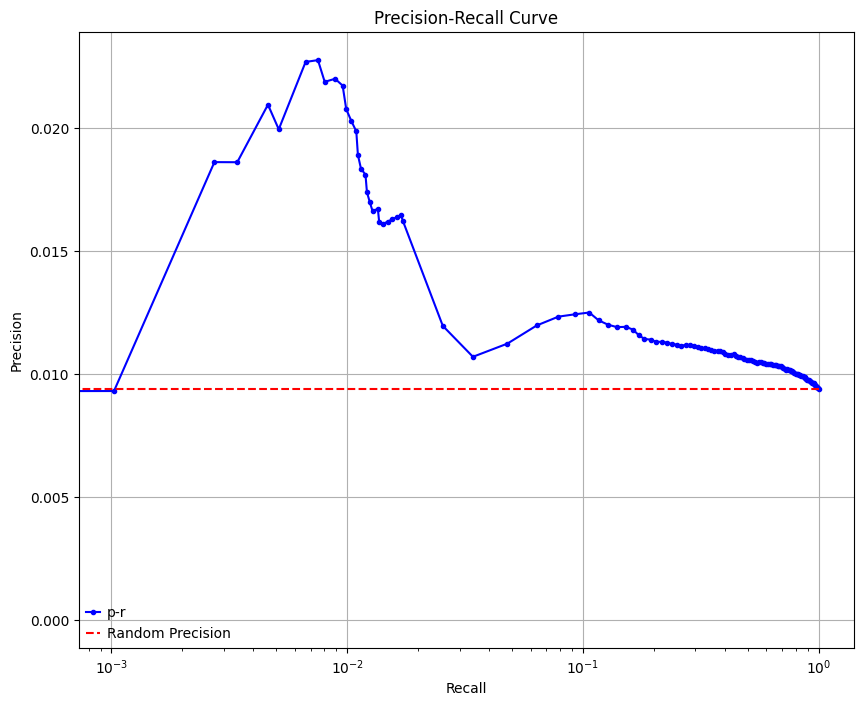

precision:  0.00015343270342985481 
recall:  1.0 
random precision: 0.00015345120713263218


100%|██████████| 128/128 [00:06<00:00, 20.88it/s]


Average Precision (AP):  0.00016257064855067433
Area Under Precision-Recall Curve (AUPRC):  0.00016157106782395378
EPR: 5.37851462273678


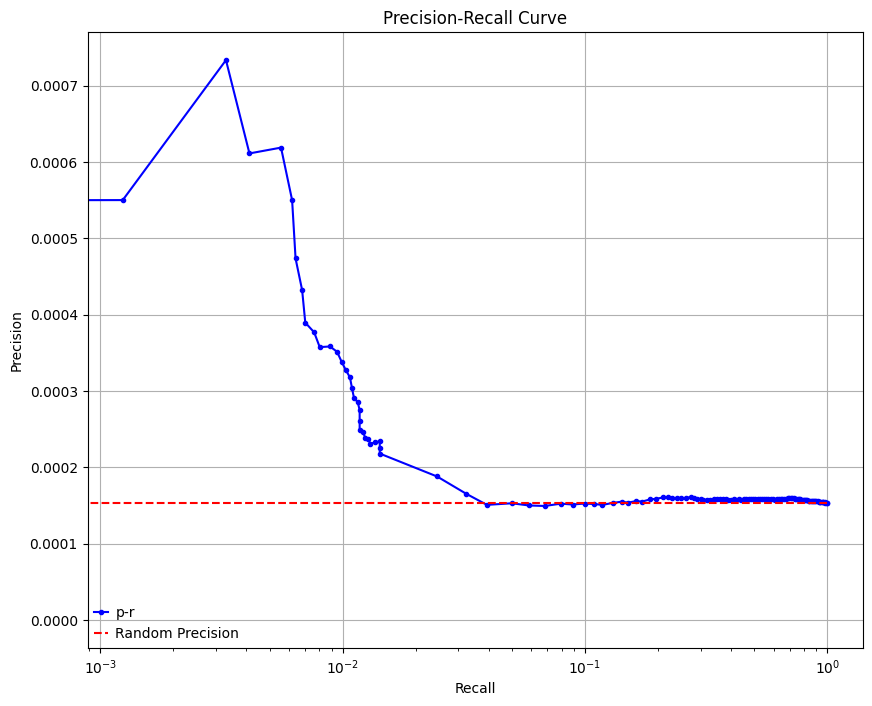

precision:  0.000845423839273101 
recall:  1.0 
random precision: 0.0008455257958383775


100%|██████████| 128/128 [00:01<00:00, 77.90it/s]


Average Precision (AP):  0.0007630712623028703
Area Under Precision-Recall Curve (AUPRC):  0.0007623535344999182
EPR: 0.5102403799056766


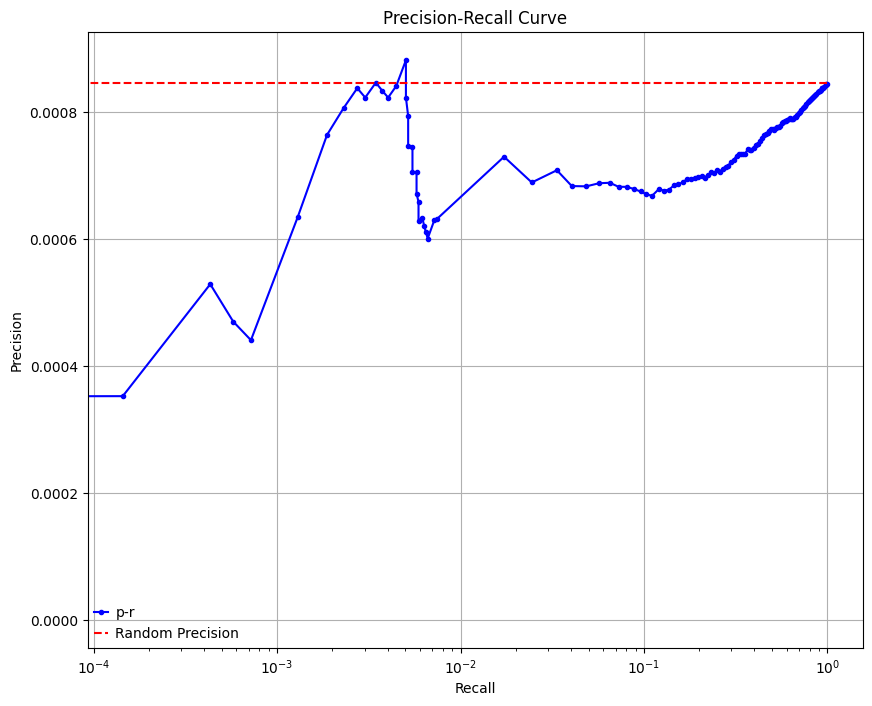

{'precision': 0.000845423839273101,
 'recall': 1.0,
 'rand_precision': 0.0008455257958383775,
 'auprc': 0.0007623535344999182,
 'ap': 0.0007630712623028703,
 'epr': 0.5102403799056766}

In [74]:
BenGRN(grn).compare_to(to="collectri")
BenGRN(grn).compare_to(gt_inter)
BenGRN(grn).compare_to(gt_cm)